# tracking_app

## Load Data

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import gpxpy
import matplotlib.pyplot as plt
import datetime
#from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
#import plotly.plotly as py
#import plotly.graph_objs as go
import haversine

#### https://towardsdatascience.com/how-tracking-apps-analyse-your-gps-data-a-hands-on-tutorial-in-python-756d4db6715d

In [2]:
# Amazfit Stratos
gpx_file = open('2018-12-17.14.36.15.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

print(gpx)

GPX(tracks=[GPXTrack(name=u'Sport', segments=[GPXTrackSegment(points=[...])])])


## Merge, Positions

In [3]:
## Merge, Positions

data = gpx.tracks[0].segments[0].points
#print('data:', data)

# Start Position
start = data[0]
print('start:', start)

# End Position
finish = data[-1]
print('finish', finish)

('start:', GPXTrackPoint(47.206325531, 11.4124298096, time=datetime.datetime(2018, 12, 6, 14, 32, 37)))
('finish', GPXTrackPoint(47.2068786621, 11.4125413895, elevation=968.68212890625, time=datetime.datetime(2018, 12, 6, 14, 56, 4)))


## Dataframe

In [4]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 
                    'alt' : point.elevation, 'time' : point.time}, 
                   ignore_index=True)

df.describe()

,lon,lat,alt
count,529.000000,529.000000,523.000000
mean,11.409508,47.213813,941.732903
std,0.001517,0.004361,20.226267
min,11.406834,47.206326,902.591187
25%,11.408353,47.209976,924.681946
50%,11.409276,47.213619,944.591003
75%,11.410870,47.217674,961.045471
max,11.412657,47.221169,974.500000


## Plots

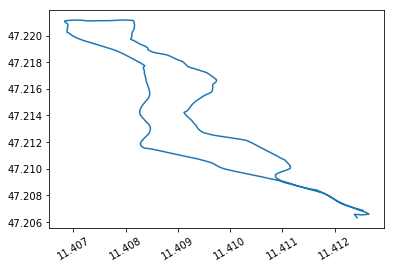

In [5]:
plt.xticks(rotation=30)
plt.plot(df['lon'], df['lat'])

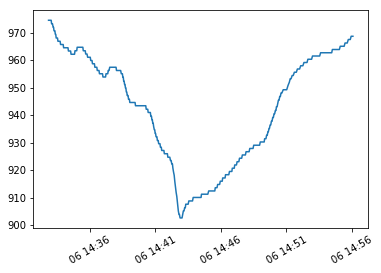

In [6]:
plt.xticks(rotation=30)
plt.plot(df['time'], df['alt'])

## Basemap

##### # http://www.datasciencemadesimple.com/get-maximum-value-column-python-pandas/

In [7]:
# Make edge for basemap
lon_lat_add = .01
lon_min = df['lon'].min() - lon_lat_add
lon_max = df['lon'].max() + lon_lat_add

lat_min = df['lat'].min() - lon_lat_add
lat_max = df['lat'].max() + lon_lat_add

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=11.3968336487,47.196325531,11.4226567841,47.2311685181&bboxSR=4269&imageSR=4269&size=1000,1349&dpi=300&format=png32&transparent=true&f=image


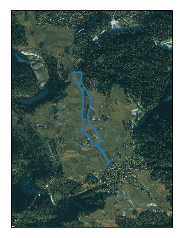

In [9]:
from mpl_toolkits.basemap import Basemap


m = Basemap(  
            llcrnrlon=lon_min, urcrnrlon=lon_max,    
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            epsg=4269,    # Default
            ) 
m.arcgisimage(#service='World_Topo_Map',    # Straßenkarte grobskalig   
              #service='World_Terrain_Base',   # Does not work
              #service='Elevation/ESRI_Elevation_World',   # Does not work
              #service='ESRI_Imagery_World_2D',   
              xpixels = 1000,    # Default 1000, 100 bei World_Topo_Map  
              verbose= True,
              dpi=300
              )
m.plot(df['lon'], df['lat'])